In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Copy of customer_transactions_sample.csv',encoding='latin1')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/01/2009 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/01/2009 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/01/2009 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/01/2009 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


((525461, 8), None)

In [4]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day, month, and year
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Remove the time component from 'InvoiceDate'
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,1,12,2009


In [7]:
df.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
Day                 0
Month               0
Year                0
dtype: int64

In [8]:
df.shape

(525461, 11)

In [9]:
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['Invoice', 'Customer ID'])

df.isna().sum()

Invoice           0
StockCode         0
Description    2928
Quantity          0
InvoiceDate       0
Price             0
Customer ID    5229
Country           0
Day               0
Month             0
Year              0
dtype: int64

In [10]:
## Fill the missing value

df['Description'].fillna('Unknown', inplace=True)
df.dropna(subset=['Customer ID'], inplace=True)


In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,1,12,2009
8,489435,22350,CAT BOWL,12,2009-12-01,2.55,13085.0,United Kingdom,1,12,2009
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01,5.95,13078.0,United Kingdom,1,12,2009
31,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01,2.10,15362.0,United Kingdom,1,12,2009
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01,0.98,18102.0,United Kingdom,1,12,2009


In [12]:
# Assuming df is your DataFrame
num_unique_descriptions = df['Description'].nunique()
print("Number of unique descriptions:", num_unique_descriptions)


Number of unique descriptions: 3118


In [13]:
df.shape

(23587, 11)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Description'] = label_encoder.fit_transform(df['Description'])

In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,85048,40,12,2009-12-01,6.95,13085.0,United Kingdom,1,12,2009
8,489435,22350,559,12,2009-12-01,2.55,13085.0,United Kingdom,1,12,2009
12,489436,48173C,847,10,2009-12-01,5.95,13078.0,United Kingdom,1,12,2009
31,489437,22143,650,6,2009-12-01,2.10,15362.0,United Kingdom,1,12,2009
54,489438,21329,829,28,2009-12-01,0.98,18102.0,United Kingdom,1,12,2009


In [16]:
num_unique_countries = df['Country'].nunique()
print("Number of unique countries", num_unique_countries)

Number of unique countries 37


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Country'] = label_encoder.fit_transform(df['Country'])
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,85048,40,12,2009-12-01,6.95,13085.0,34,1,12,2009
8,489435,22350,559,12,2009-12-01,2.55,13085.0,34,1,12,2009
12,489436,48173C,847,10,2009-12-01,5.95,13078.0,34,1,12,2009
31,489437,22143,650,6,2009-12-01,2.10,15362.0,34,1,12,2009
54,489438,21329,829,28,2009-12-01,0.98,18102.0,34,1,12,2009


In [18]:
num_unique_st_code = df['StockCode'].nunique()
print("Number of unique StockCode", num_unique_st_code)

Number of unique StockCode 2891


In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,2583,40,12,2009-12-01,6.95,13085.0,34,1,12,2009
8,489435,1294,559,12,2009-12-01,2.55,13085.0,34,1,12,2009
12,489436,2018,847,10,2009-12-01,5.95,13078.0,34,1,12,2009
31,489437,1114,650,6,2009-12-01,2.10,15362.0,34,1,12,2009
54,489438,525,829,28,2009-12-01,0.98,18102.0,34,1,12,2009


## Exploratory Data Analysis

In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate RFM metrics
rfm_data = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp.now() - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'Price': 'sum'  # Monetary
}).reset_index()


In [21]:
rfm_data.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'Price': 'Monetary'}, inplace=True)

rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,4974,15,161.92
1,12347.0,4910,2,5.05
2,12348.0,4981,1,0.55
3,12349.0,4950,4,211.35
4,12351.0,4918,1,0.42


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rfm_data_scaled = sc.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])
rfm_data_scaled

array([[-0.24851672,  0.95699354,  0.0521444 ],
       [-0.90047482, -0.33643914, -0.08032581],
       [-0.17720881, -0.43593396, -0.08412587],
       ...,
       [ 2.08427083, -0.43593396, -0.07196567],
       [ 0.20989131, -0.23694432, -0.07677908],
       [-0.74767214, -0.03795468, -0.0734857 ]])

In [23]:
rfm_data.shape


(4383, 4)

### 1) Marketing :
- a. “How can we best cluster our customers and get a view on
Cluster_Customer x RFM (Recency, Frequency & Monetary)”.
- i. Please create a model to cluster the customers into 3-4
segments.
- ii. Please justify quantitatively how you choose and why you
finalised the above model.
- iii. Create a view ‘similar’ to the below image and derive & present
marketing strategies out if it.

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(rfm_data_scaled)
clusters = kmeans.labels_

rfm_data['Cluster'] = clusters

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fbb199311c0>
Traceback (most recent call last):
  File "/home/devansh/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/devansh/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/devansh/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/devansh/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.5914099385238626


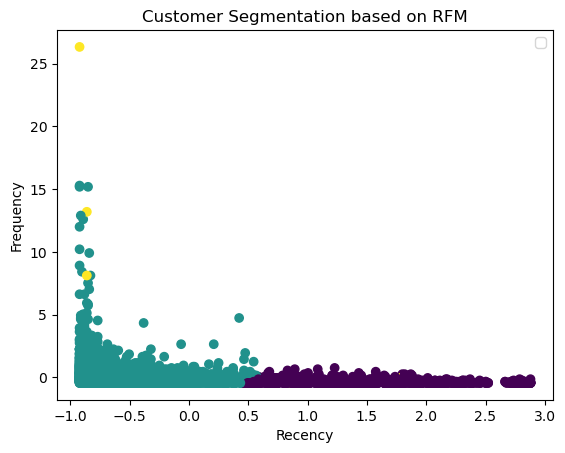

          Customer ID      Recency  Frequency      Monetary
Cluster                                                    
0        15405.078341  5150.306912   1.893088     52.929697
1        15332.784802  4948.264134   6.385410     54.315109
2        15294.750000  5012.125000  65.625000  25365.553750


In [25]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(rfm_data_scaled, clusters)
print("Silhouette Score:", silhouette_avg)

# Visualize the clusters (if RFM is 2-dimensional)
plt.scatter(rfm_data_scaled[:, 0], rfm_data_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segmentation based on RFM')
plt.legend()
plt.show()

cluster_means = rfm_data.groupby('Cluster').mean()
print(cluster_means)

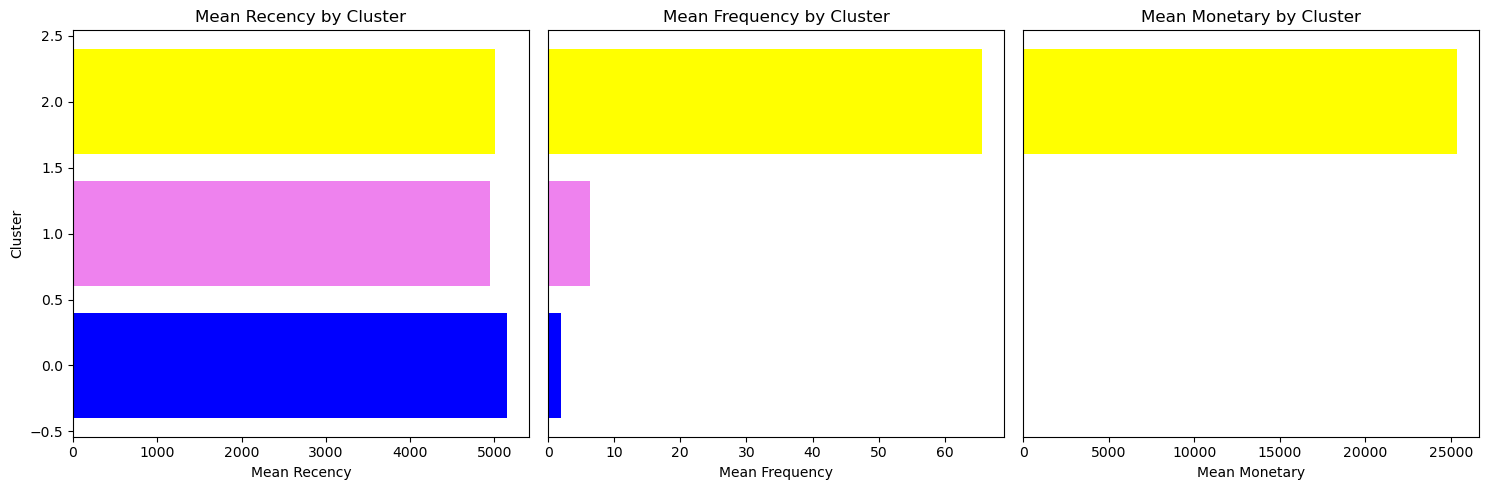

In [26]:
rfm_components = ['Recency', 'Frequency', 'Monetary']
colors = ['blue', 'violet', 'yellow']

fig, axes = plt.subplots(1, len(rfm_components), figsize=(15, 5))

for i, component in enumerate(rfm_components):
    axes[i].barh(cluster_means.index, cluster_means[component], color=colors)
    axes[i].set_title(f'Mean {component} by Cluster')
    axes[i].set_xlabel(f'Mean {component}')
    if i == 0:
        axes[i].set_ylabel('Cluster')
    else:
        axes[i].set_yticks([]) 

plt.tight_layout()
plt.show()

### 2) Operation team:
- a. “How can we forecast sales to make sure that we have enough stock
for the next quarter (i.e. the next 3 months)”
- i. Please create a model to predict the daily sales at country level
for the next 2 months.
- ii. Please justify quantitatively how you choose and why you
finalised the above model.
- iii. Create a view similar to the below image and derive & present
marketing strategies out if it.

10:46:10 - cmdstanpy - INFO - Chain [1] start processing
10:46:10 - cmdstanpy - INFO - Chain [1] done processing
10:46:10 - cmdstanpy - INFO - Chain [1] start processing
10:46:10 - cmdstanpy - INFO - Chain [1] done processing
10:46:10 - cmdstanpy - INFO - Chain [1] start processing
10:46:10 - cmdstanpy - INFO - Chain [1] done processing
10:46:10 - cmdstanpy - INFO - Chain [1] start processing
10:46:10 - cmdstanpy - INFO - Chain [1] done processing
10:46:10 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing


Skipping country 4.0 due to insufficient data.


10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:11 - cmdstanpy - INFO - Chain [1] done processing
10:46:11 - cmdstanpy - INFO - Chain [1] start processing
10:46:12 - cmdstanpy - INFO - Chain [1] done processing
10:46:12 - cmdstanpy - INFO - Chain [1] start processing
10:46:12 - cmdstanpy - INFO - Chain [1] done processing
10:46:12 - cmdstanpy - INFO - Chain [1] start processing
10:46:12 - cmdstanpy - INFO - Chain [1]

Skipping country 26.0 due to insufficient data.


10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:13 - cmdstanpy - INFO - Chain [1] start processing
10:46:13 - cmdstanpy - INFO - Chain [1] done processing
10:46:14 - cmdstanpy - INFO - Chain [1] start processing
10:46:14 - cmdstanpy - INFO - Chain [1] done processing


Skipping country 36.0 due to insufficient data.
Mean Absolute Error: 237.33


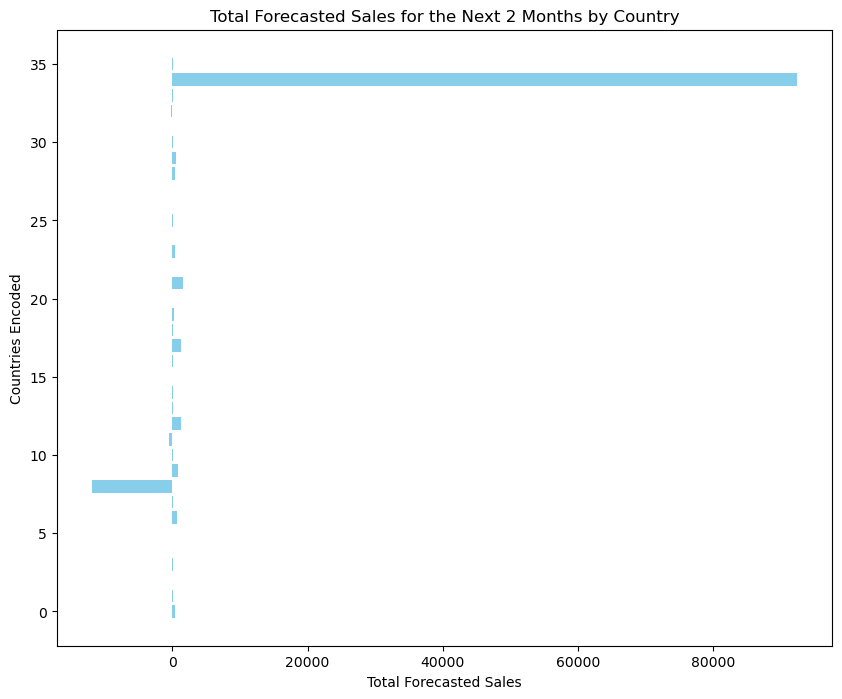

Country: 0.0
Total Forecasted Sales for Next 2 Months: 339.7272943861074
Strategy: Increase stock levels in 0.0 to meet the higher demand.
Country: 1.0
Total Forecasted Sales for Next 2 Months: 64.08274253709419
Strategy: Increase stock levels in 1.0 to meet the higher demand.
Country: 2.0
Total Forecasted Sales for Next 2 Months: 26.559003652173885
Strategy: Increase stock levels in 2.0 to meet the higher demand.
Country: 3.0
Total Forecasted Sales for Next 2 Months: 175.3104157480386
Strategy: Increase stock levels in 3.0 to meet the higher demand.
Country: 5.0
Total Forecasted Sales for Next 2 Months: -29.142798219000007
Strategy: Maintain current stock levels in 5.0.
Country: 6.0
Total Forecasted Sales for Next 2 Months: 635.9003888162919
Strategy: Increase stock levels in 6.0 to meet the higher demand.
Country: 7.0
Total Forecasted Sales for Next 2 Months: 34.27581473145952
Strategy: Increase stock levels in 7.0 to meet the higher demand.
Country: 8.0
Total Forecasted Sales for Ne

In [27]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

weekly_sales = df.groupby(['Country', pd.Grouper(key='InvoiceDate', freq='W-MON')])[['Quantity']].sum().reset_index()
weekly_sales = weekly_sales.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

# Fill missing weeks with interpolation
weekly_sales = weekly_sales.set_index('ds').groupby('Country').apply(lambda group: group.asfreq('W-MON').interpolate(method='linear')).reset_index(level=0, drop=True).reset_index()

# Fit the model for each country
country_forecasts = []
for country in weekly_sales['Country'].unique():
    country_data = weekly_sales[weekly_sales['Country'] == country]
    
    # Check if there are enough data points
    if country_data['y'].notnull().sum() < 2:
        print(f"Skipping country {country} due to insufficient data.")
        continue
    
    # Create a new Prophet model instance for each country
    model = Prophet()
    model.fit(country_data)
    
    # Make a future DataFrame for forecasting
    future = model.make_future_dataframe(periods=8, freq='W')  # Forecasting for 8 weeks (2 months)
    forecast = model.predict(future)
    
    # Add the country and forecast to the list
    forecast['Country'] = country
    country_forecasts.append(forecast)

# Concatenate the forecasts for all countries
if country_forecasts:
    forecasts = pd.concat(country_forecasts)

    # Evaluate the model performance
    actuals = weekly_sales.set_index(['ds', 'Country'])['y']
    forecasted = forecasts.set_index(['ds', 'Country'])['yhat']

    combined = actuals.to_frame().join(forecasted, how='inner')
    mae = mean_absolute_error(combined['y'], combined['yhat'])
    print(f"Mean Absolute Error: {mae:.2f}")

    # Visualize the forecast for a specific country
    country = 'United Kingdom'  # Replace with the desired country
    if country in weekly_sales['Country'].unique():
        country_forecast = forecasts[forecasts['Country'] == country]

        plt.figure(figsize=(12, 6))
        plt.plot(weekly_sales[weekly_sales['Country'] == country]['ds'], weekly_sales[weekly_sales['Country'] == country]['y'], label='Actual')
        plt.plot(country_forecast['ds'], country_forecast['yhat'], label='Forecast')
        plt.fill_between(country_forecast['ds'], country_forecast['yhat_lower'], country_forecast['yhat_upper'], alpha=0.2, color='b')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.title(f'Weekly Sales Forecast for {country}')
        plt.legend()
        plt.show()

    # Aggregate total forecasted sales for each country for the next 2 months
    total_forecast = forecasts[forecasts['ds'] > weekly_sales['ds'].max()].groupby('Country')['yhat'].sum().reset_index()

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 8))
    plt.barh(total_forecast['Country'], total_forecast['yhat'], color='skyblue')
    plt.xlabel('Total Forecasted Sales')
    plt.ylabel('Countries Encoded')
    plt.title('Total Forecasted Sales for the Next 2 Months by Country')
    plt.show()

    # Example of deriving marketing strategies based on forecast results
    for country in total_forecast['Country']:
        avg_forecast = total_forecast[total_forecast['Country'] == country]['yhat'].mean()
        print(f"Country: {country}")
        print(f"Total Forecasted Sales for Next 2 Months: {avg_forecast}")
        if avg_forecast > weekly_sales[weekly_sales['Country'] == country]['y'].mean():
            print(f"Strategy: Increase stock levels in {country} to meet the higher demand.")
        else:
            print(f"Strategy: Maintain current stock levels in {country}.")
else:
    print("No countries had sufficient data for forecasting.")

- To justify the choice and finalization of the model for forecasting sales at the country level, we can use quantitative evaluation metrics such as Mean Absolute Error (MAE),
hese metrics help assess the accuracy of the model's predictions by comparing them to the actual observed values.

- Fitting the Prophet model and making forecasts for each country, we can calculate the MAE or RMSE for the entire dataset or for each country individually. Lower values of these metrics indicate better model performance. We can choose the model with the lowest MAE or RMSE as the final model.



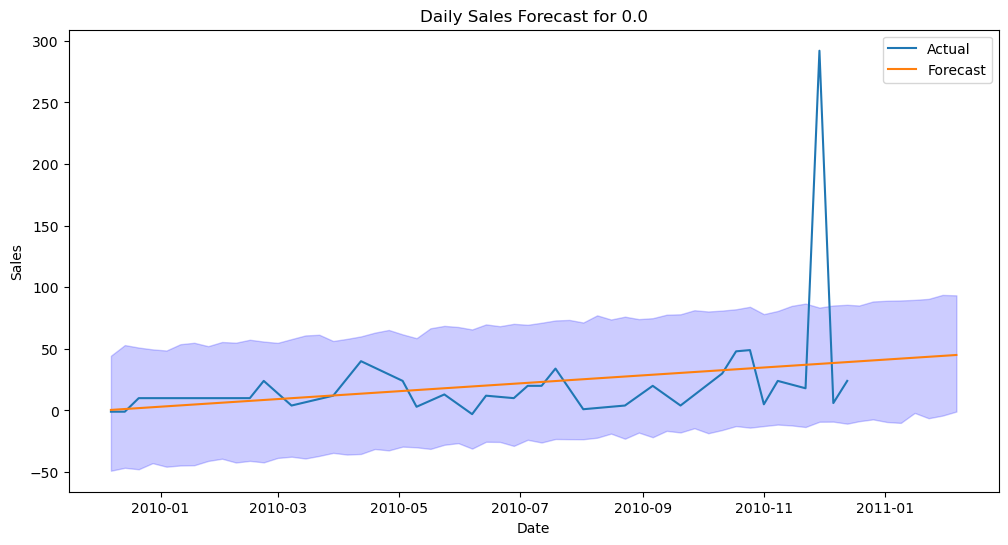

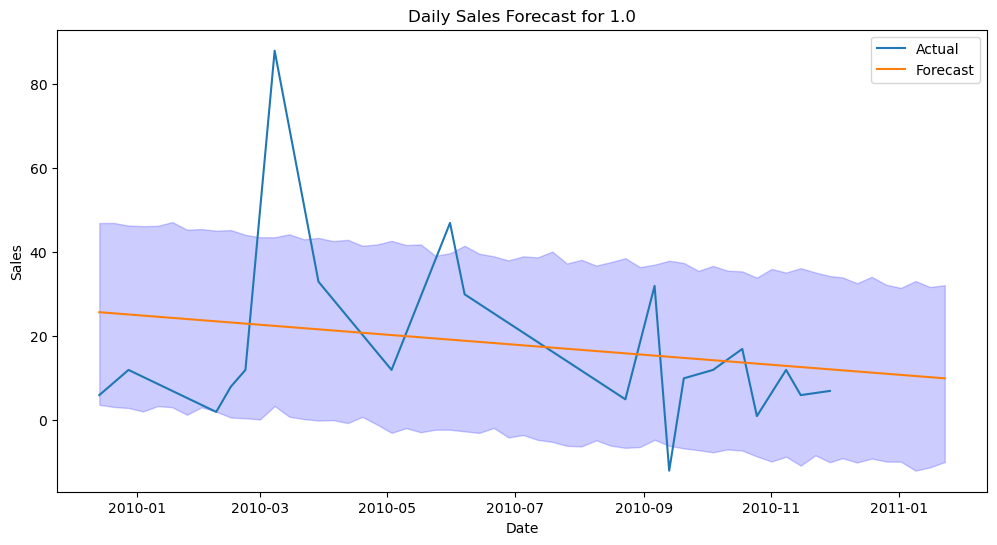

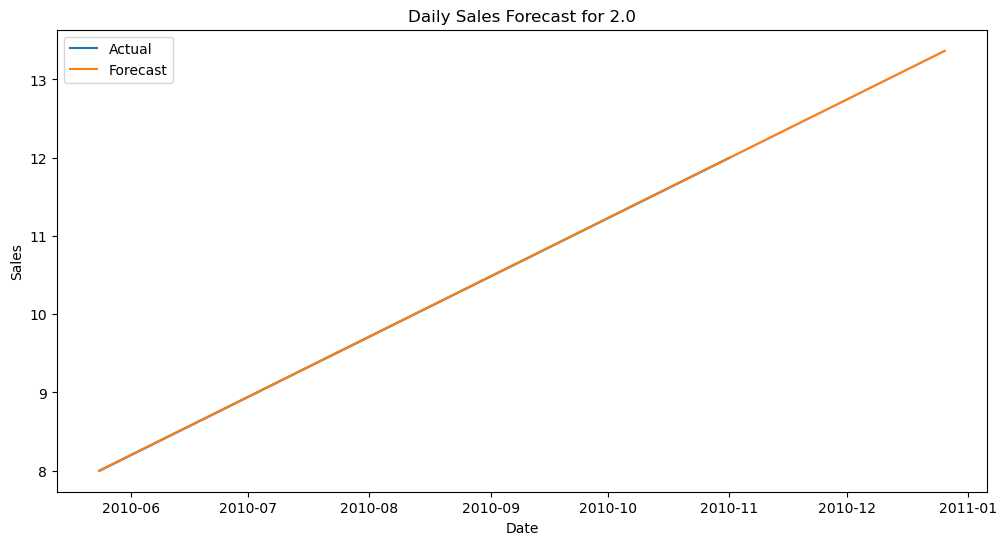

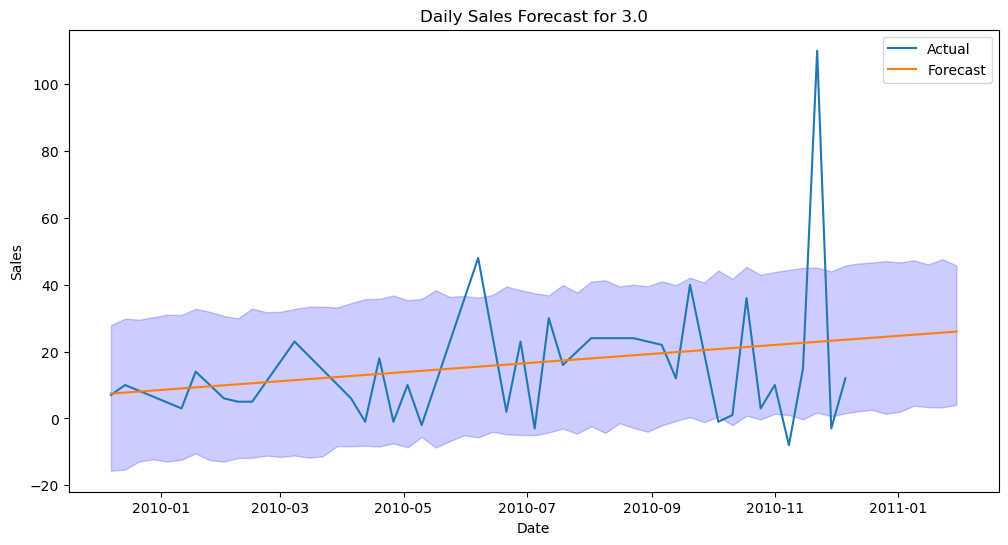

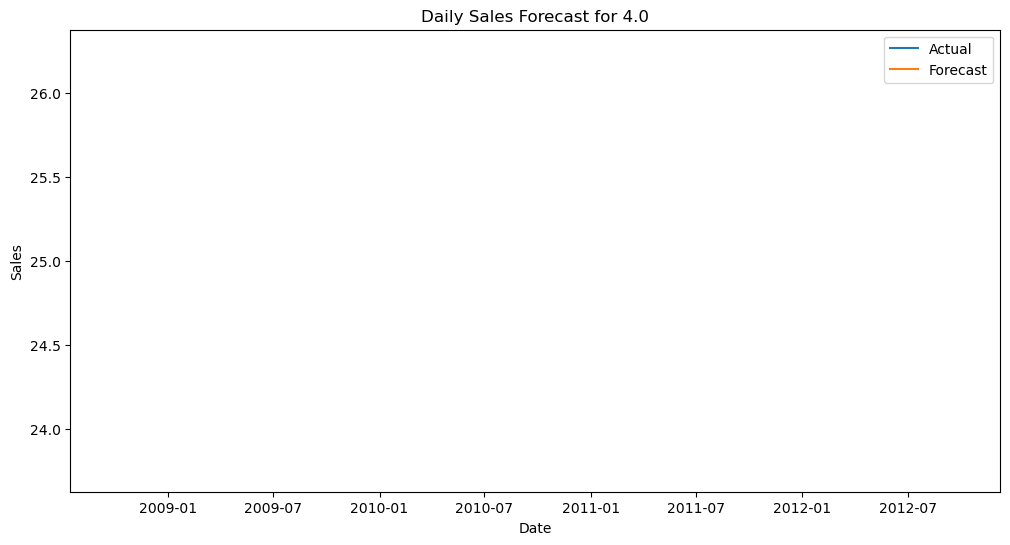

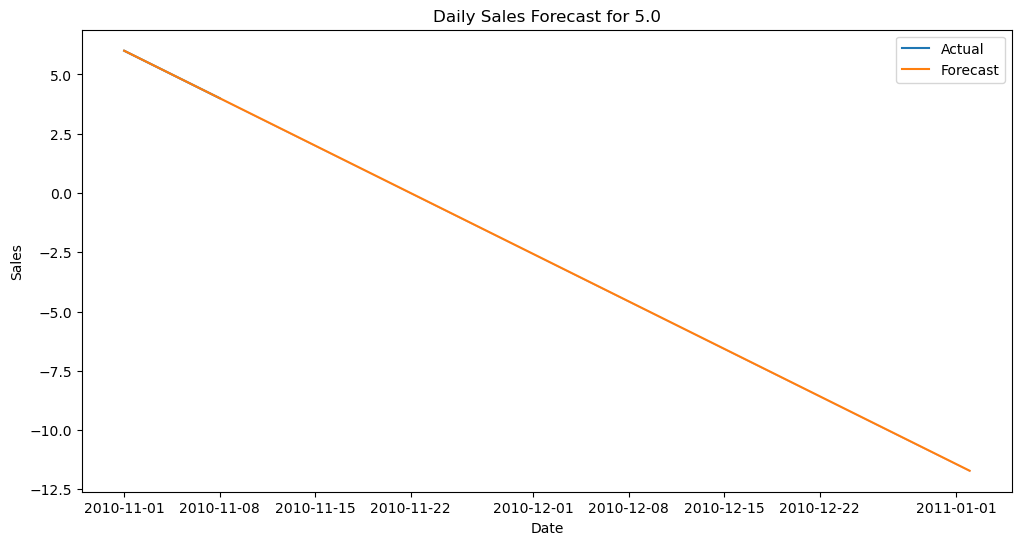

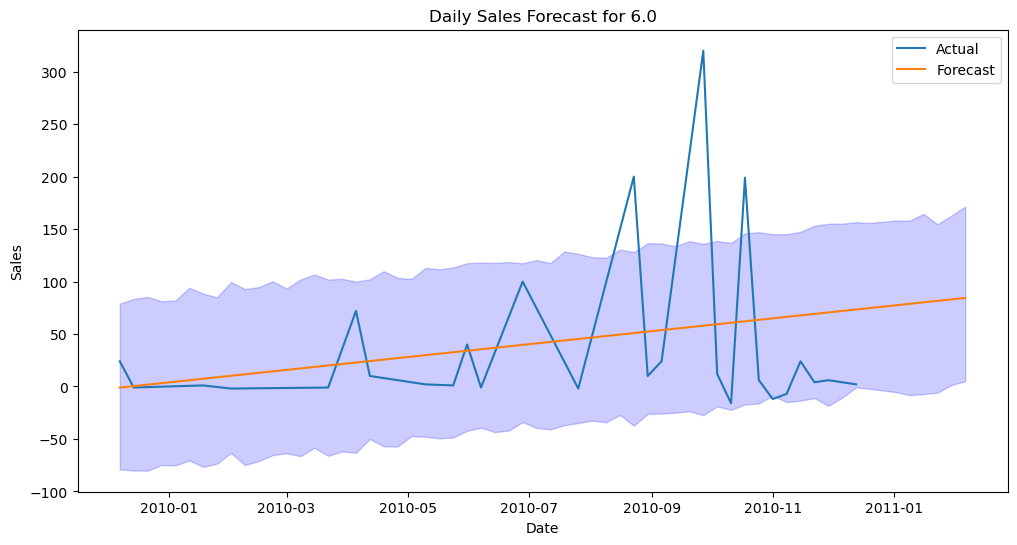

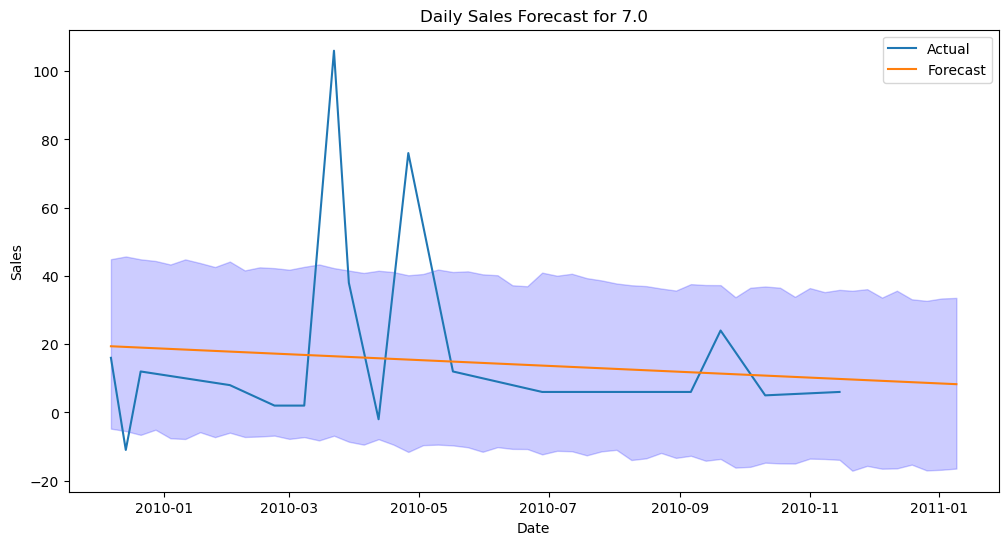

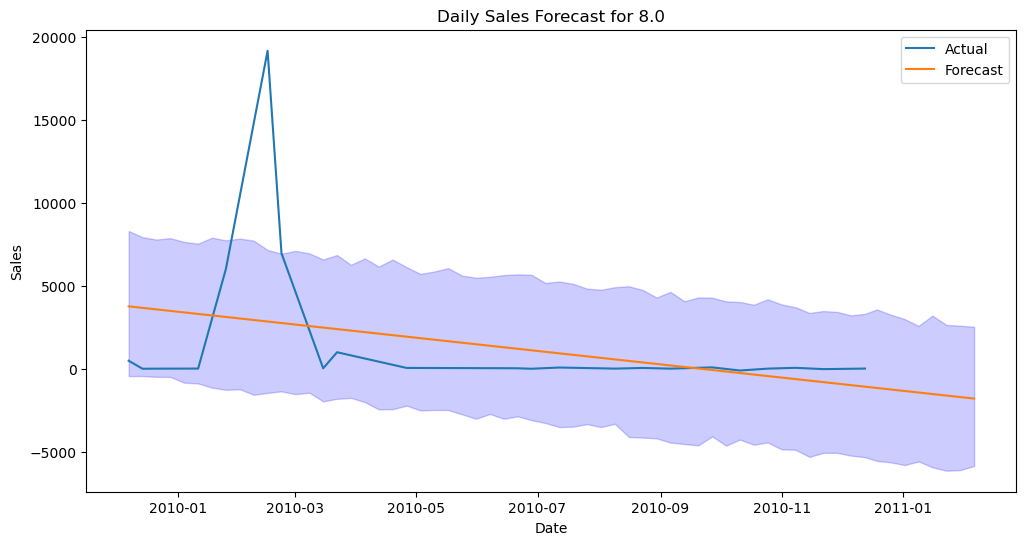

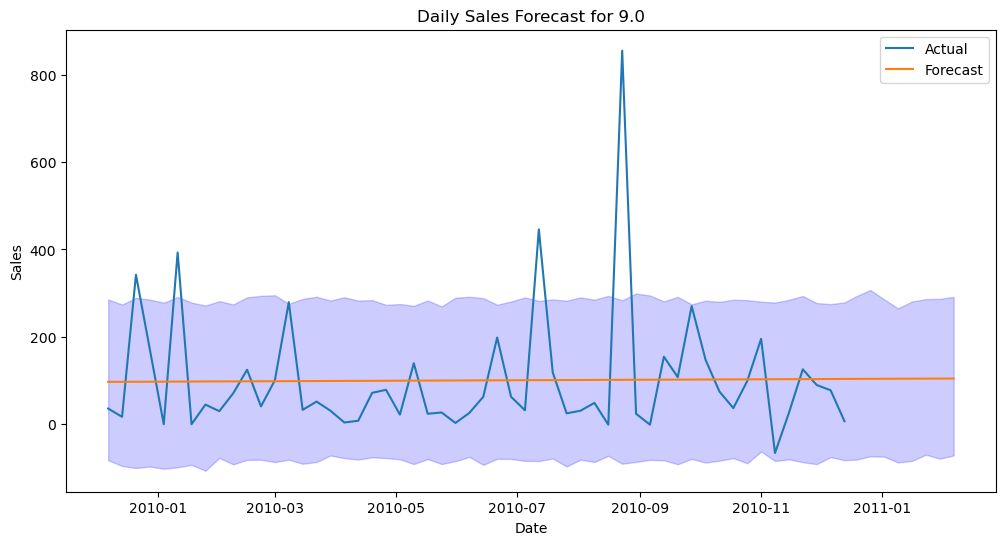

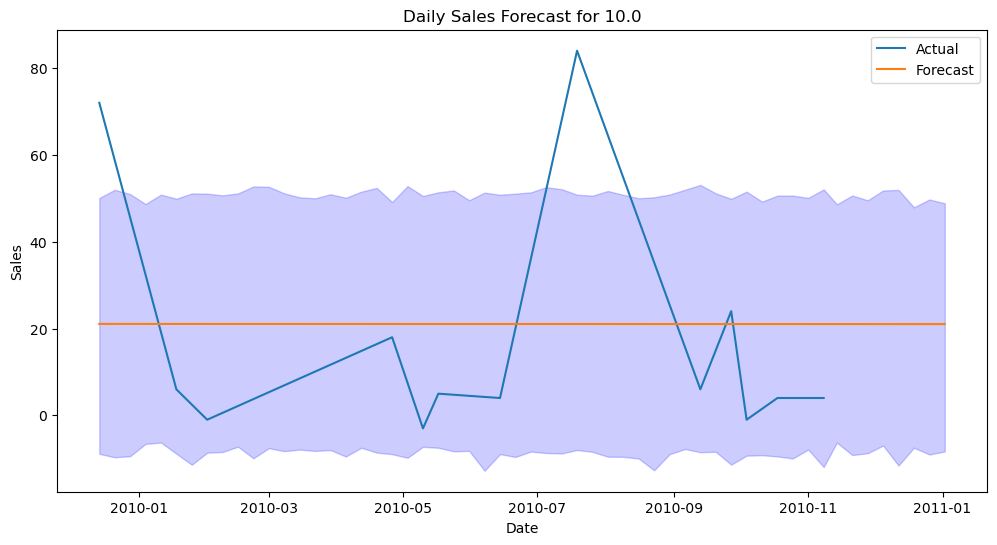

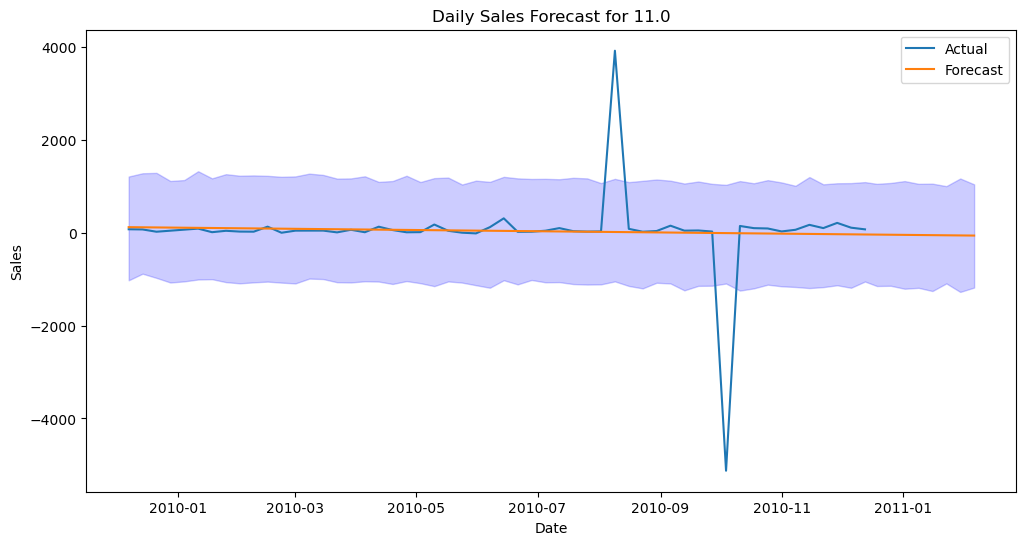

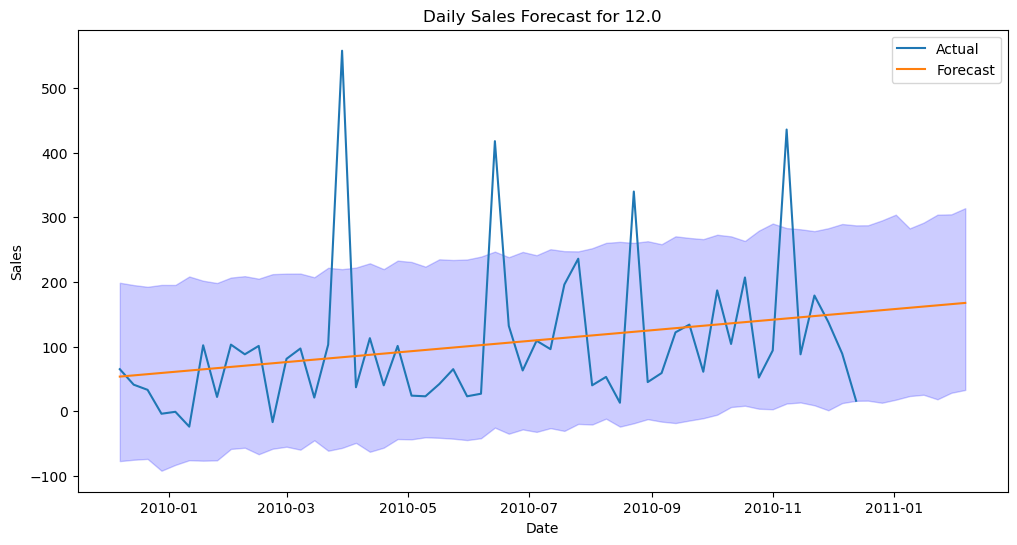

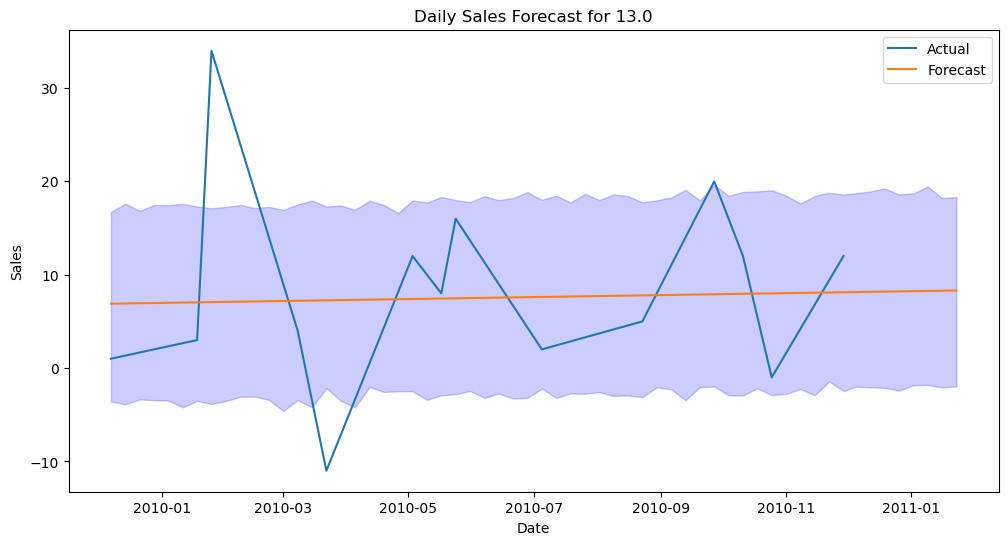

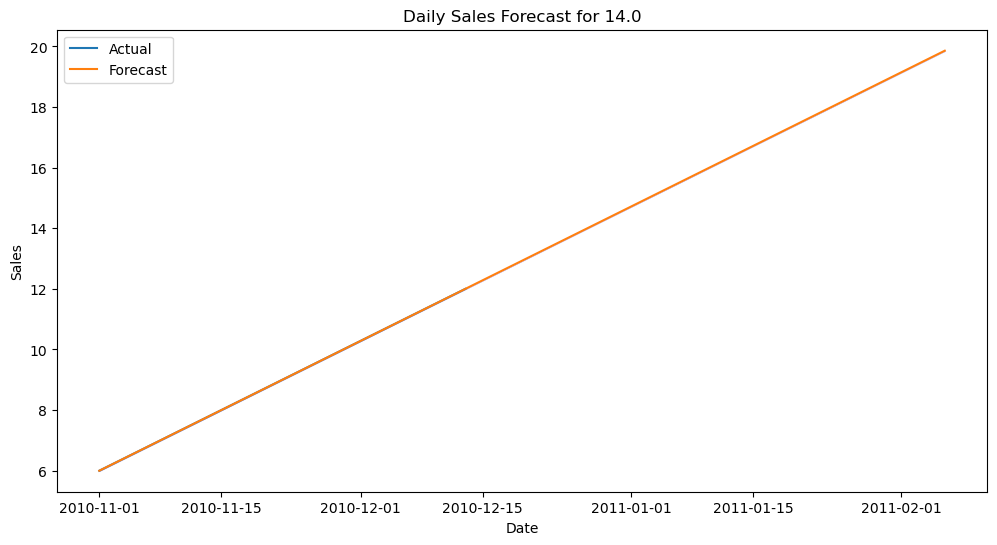

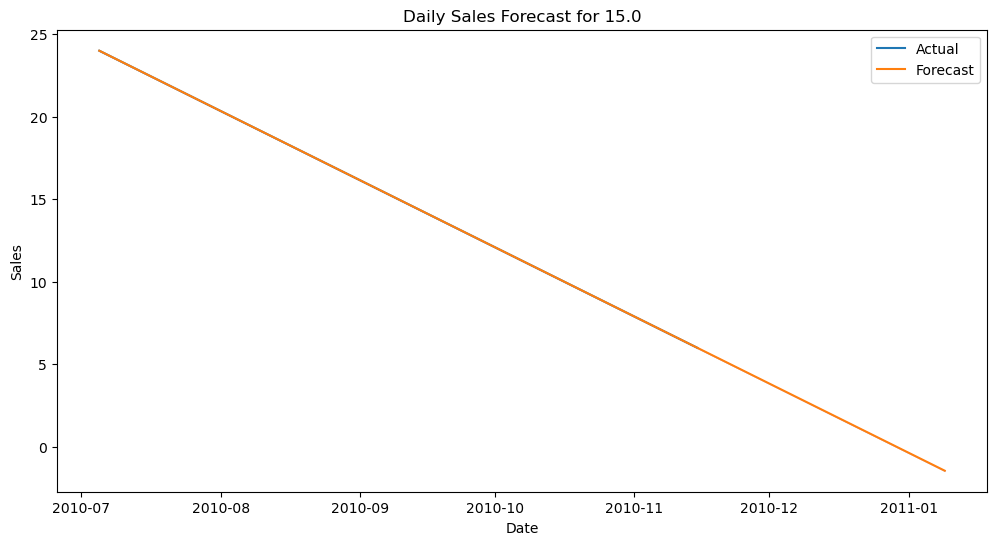

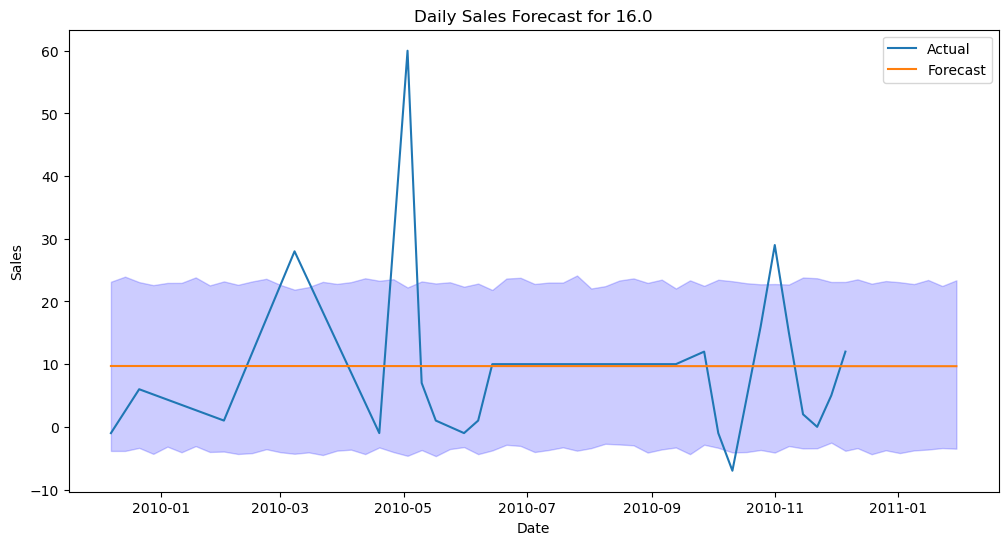

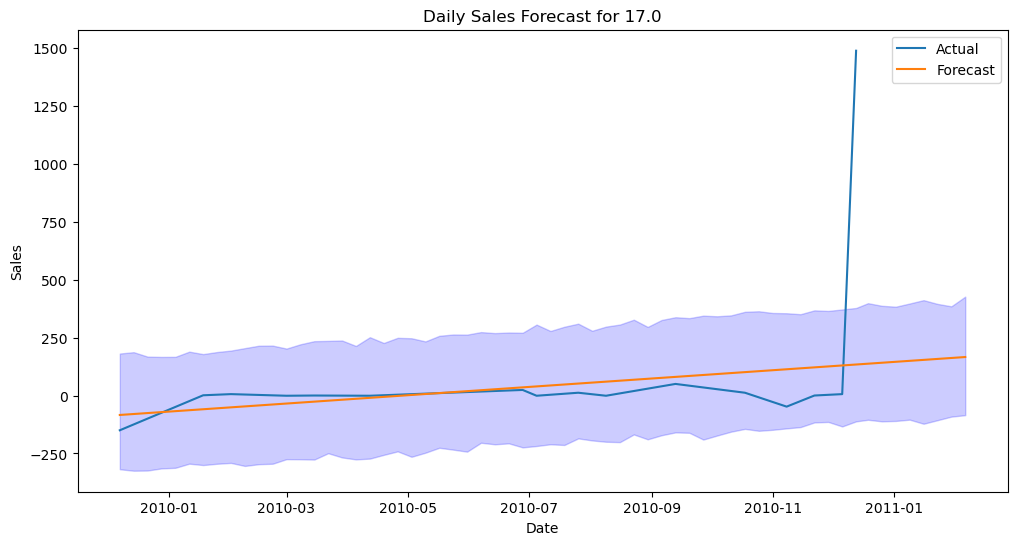

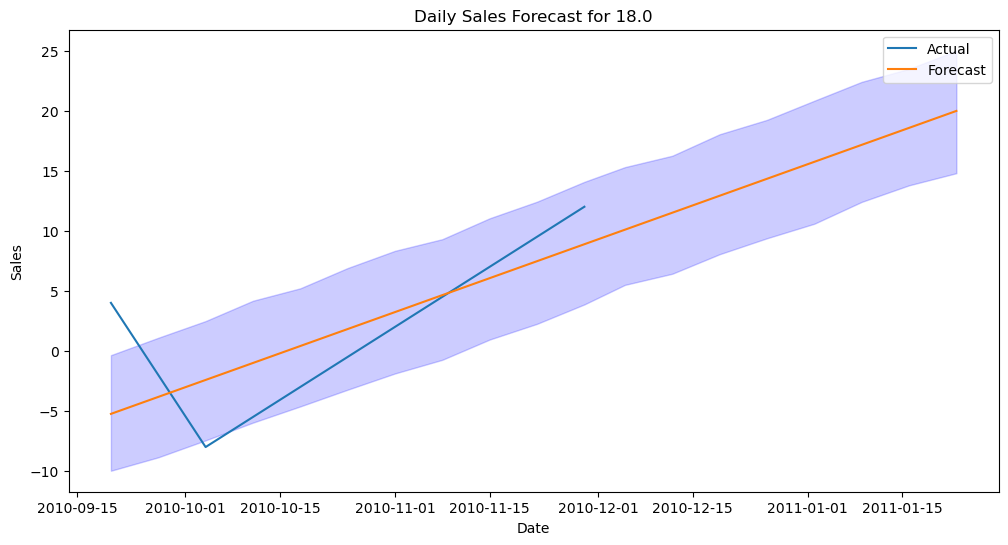

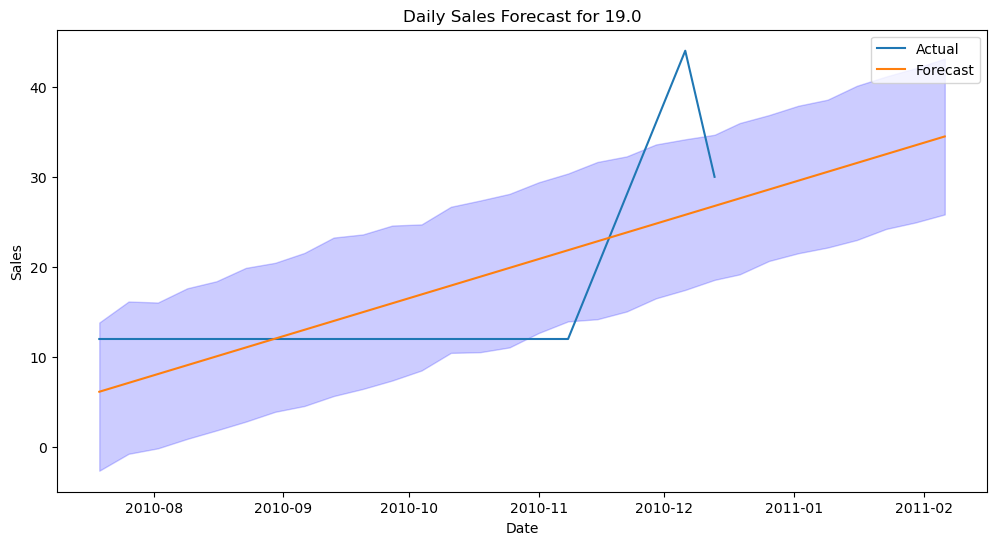

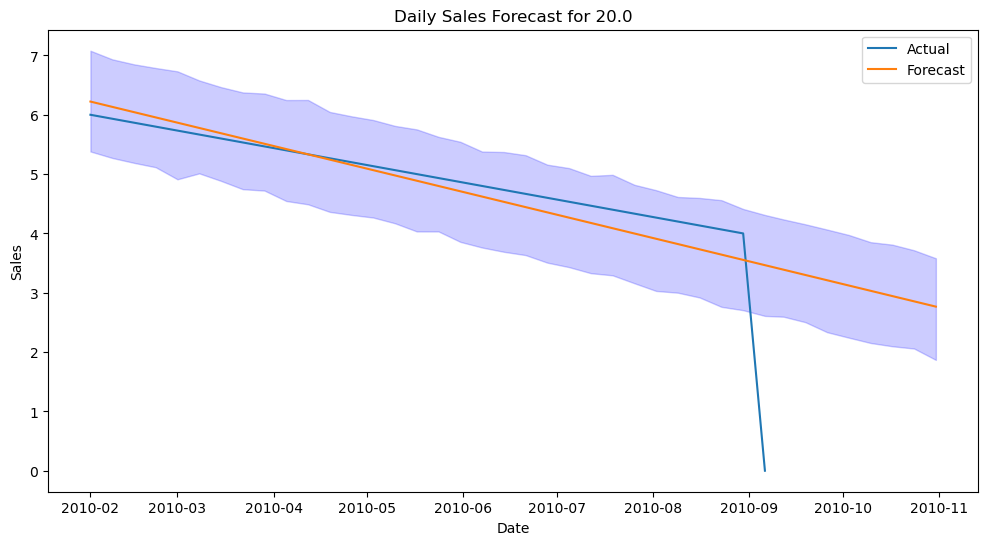

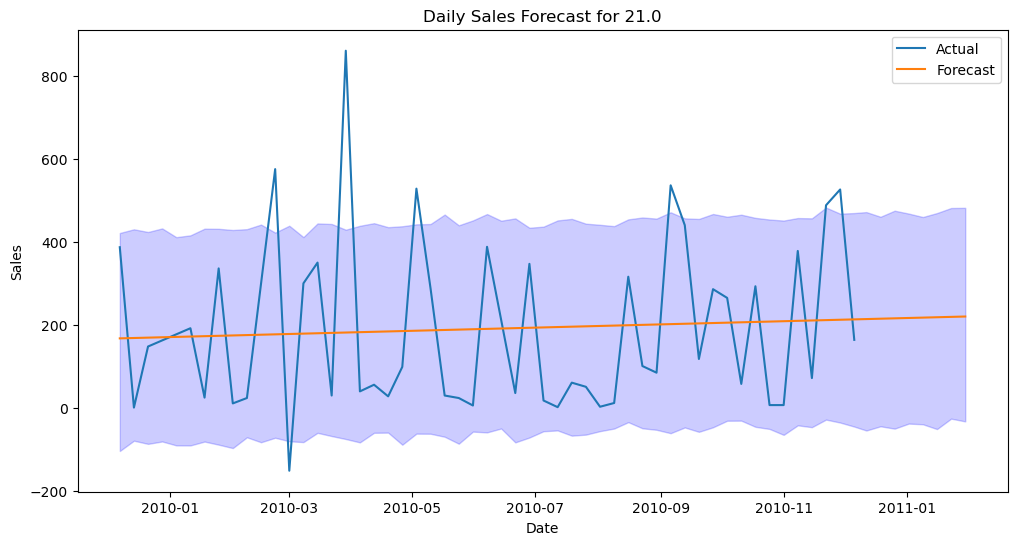

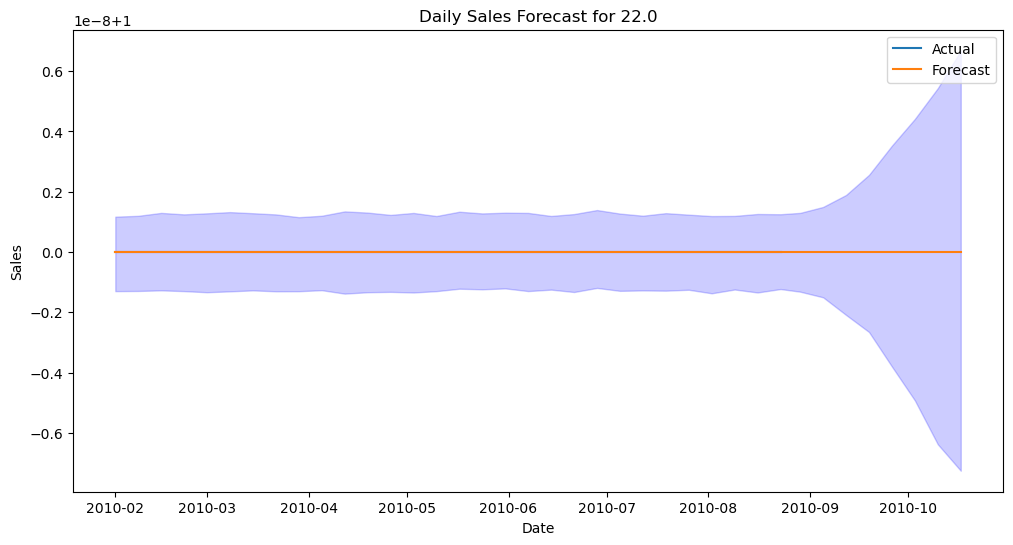

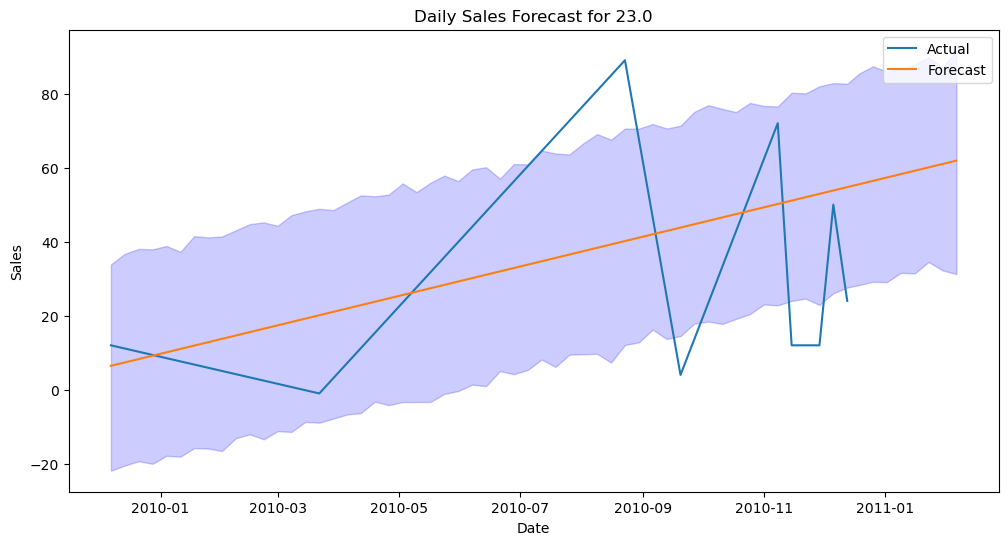

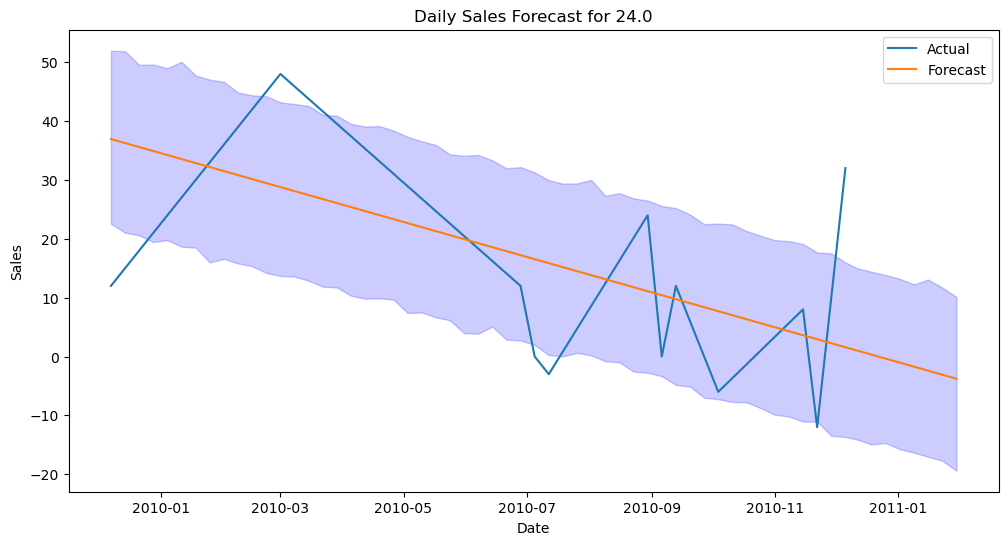

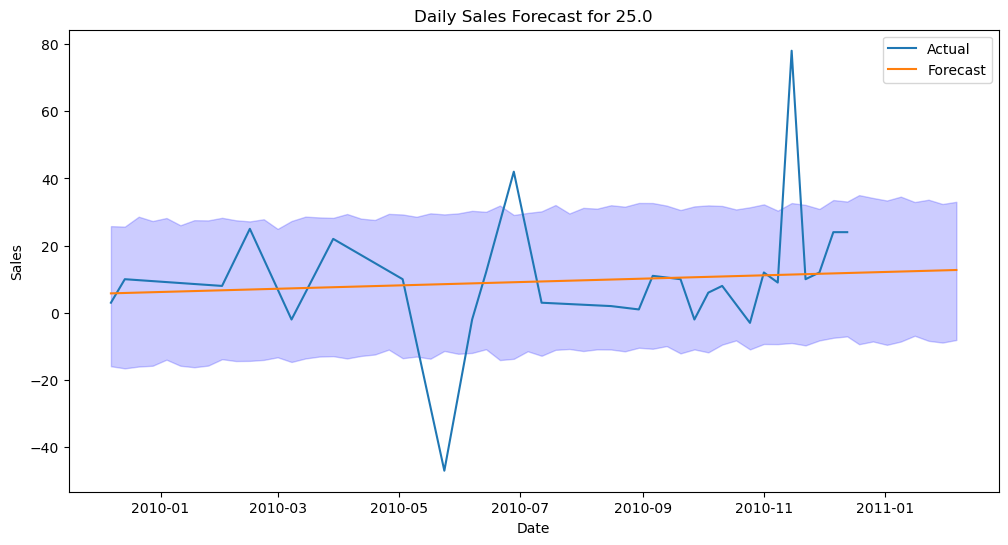

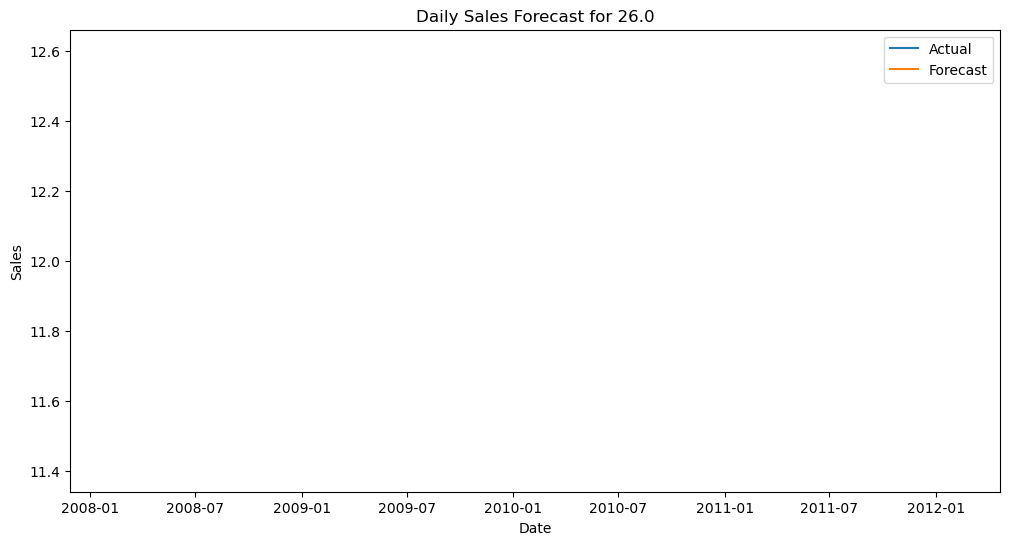

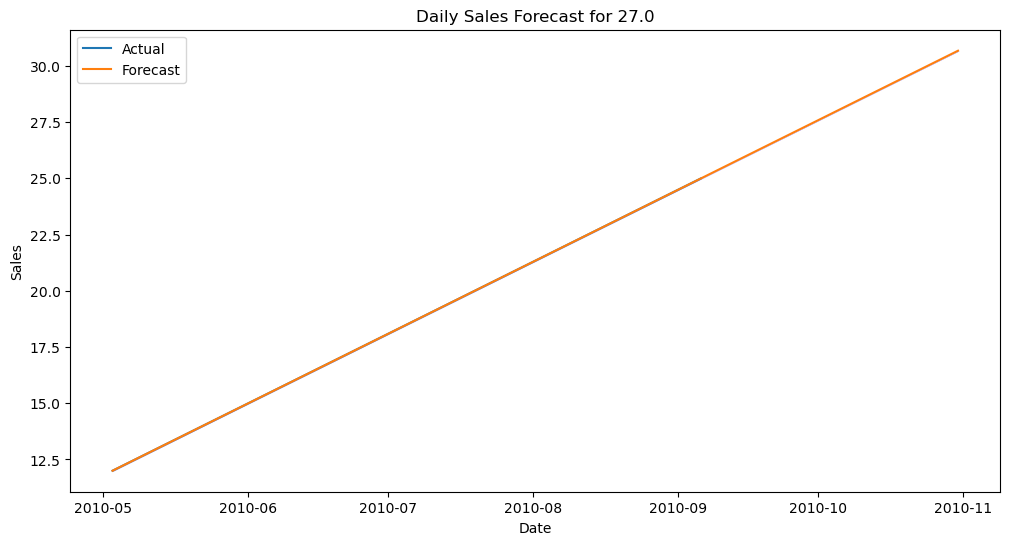

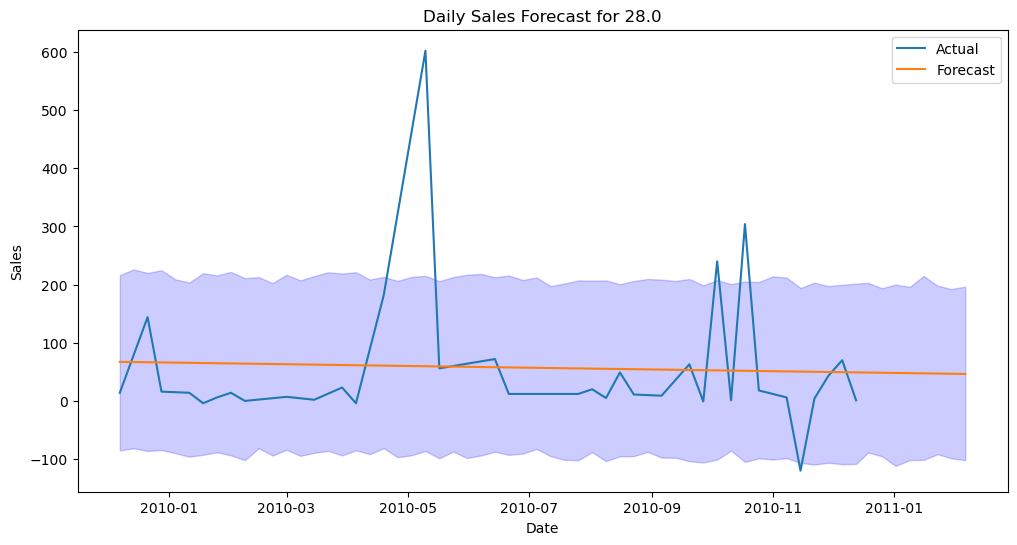

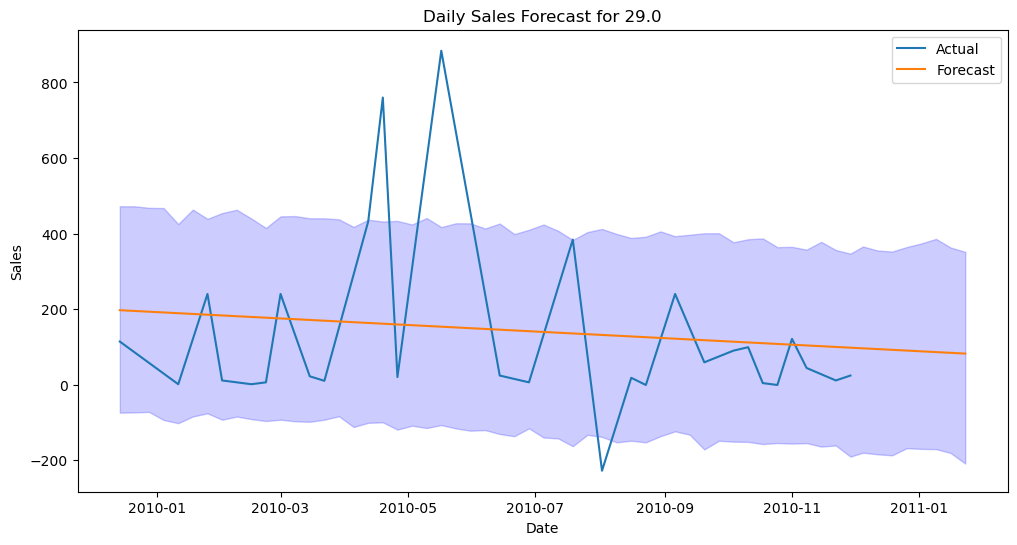

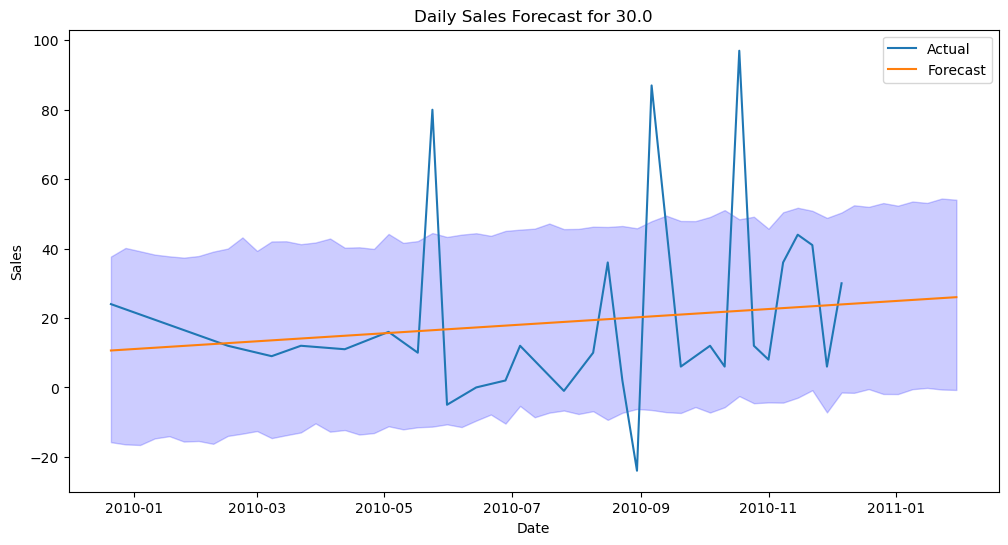

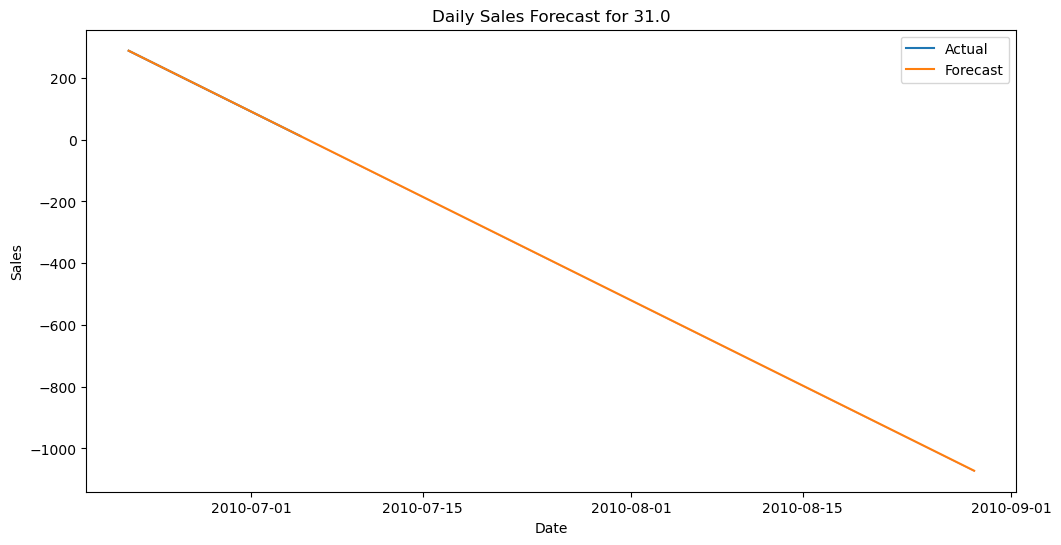

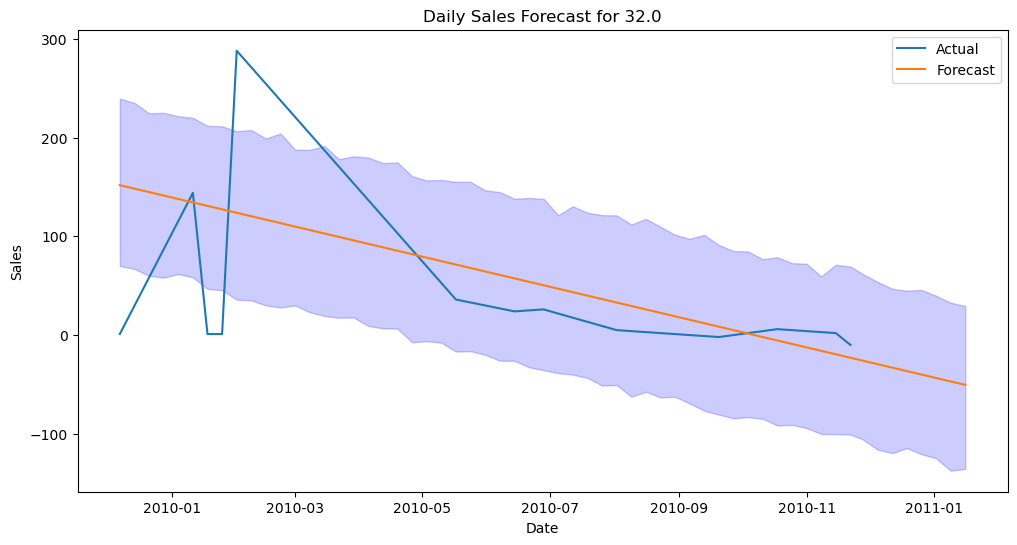

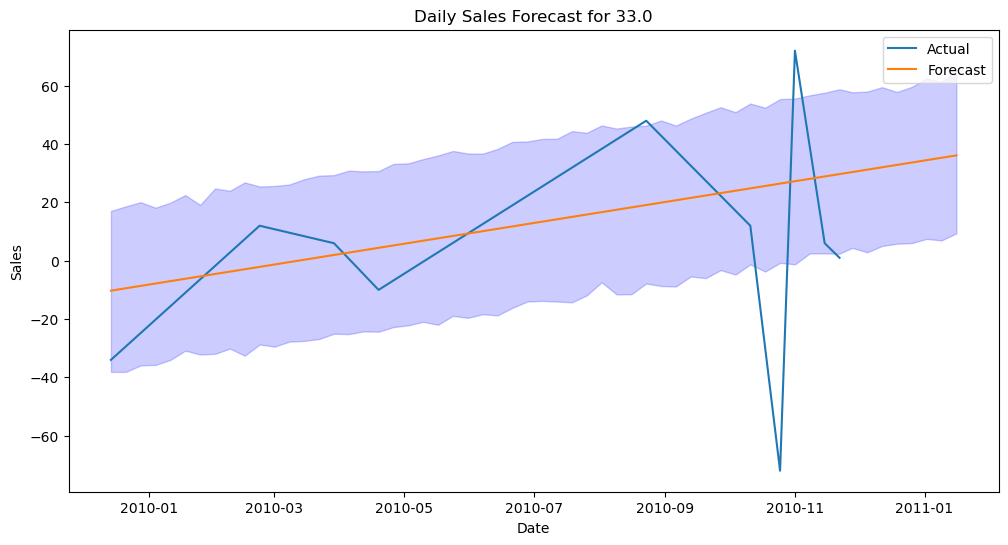

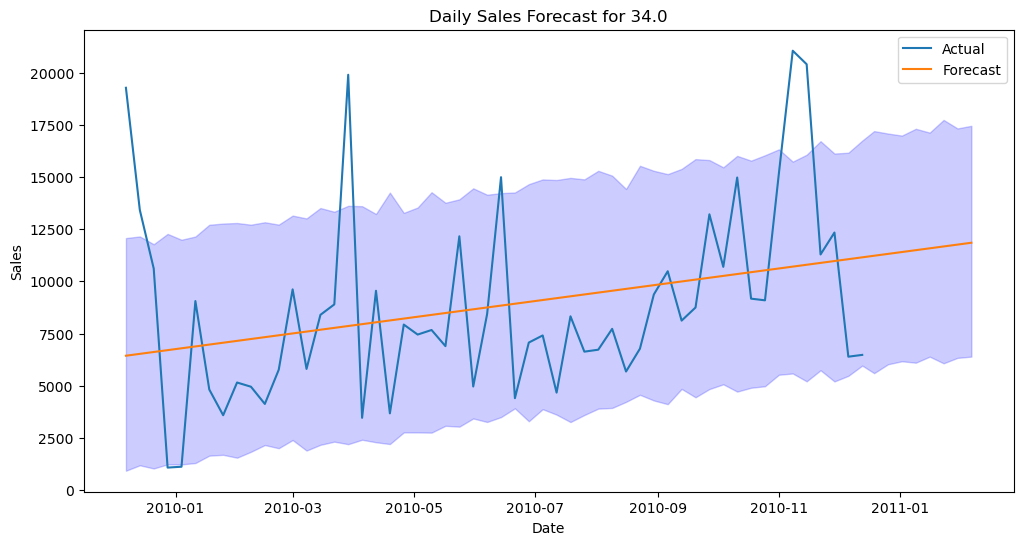

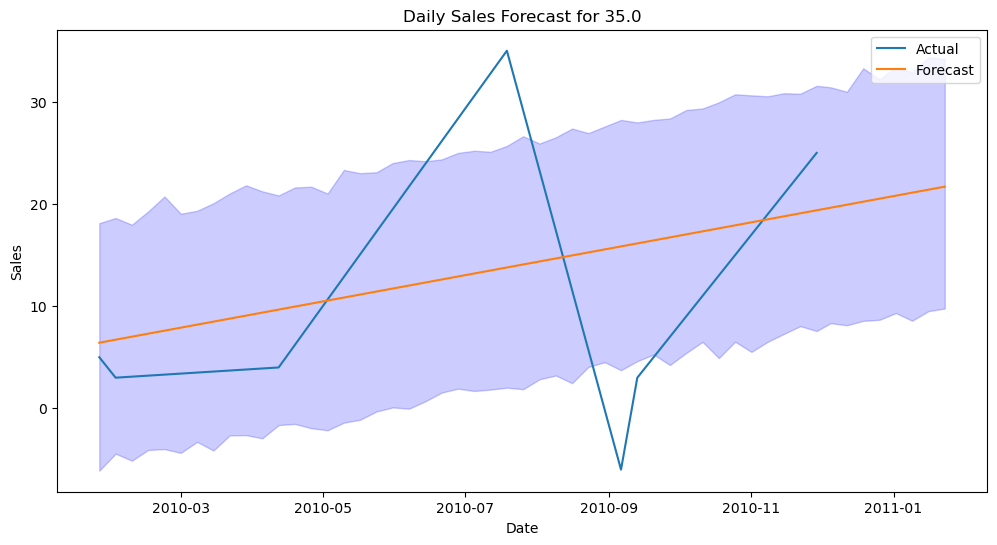

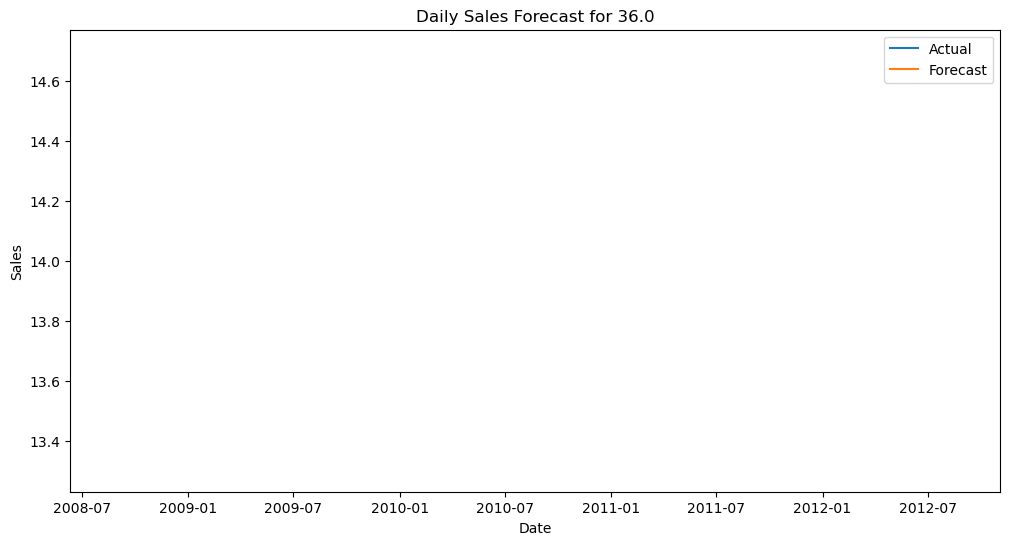

In [28]:
unique_countries = weekly_sales['Country'].unique()

# Plot forecast for each country
for country in unique_countries:
    country_forecast = forecasts[forecasts['Country'] == country]

    plt.figure(figsize=(12, 6))
    plt.plot(weekly_sales[weekly_sales['Country'] == country]['ds'], weekly_sales[weekly_sales['Country'] == country]['y'], label='Actual')
    plt.plot(country_forecast['ds'], country_forecast['yhat'], label='Forecast')
    plt.fill_between(country_forecast['ds'], country_forecast['yhat_lower'], country_forecast['yhat_upper'], alpha=0.2, color='b')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Daily Sales Forecast for {country}')
    plt.legend()
    plt.show()


### 3) Retail products team:
- a. “How can we arrange the shelf in each store so that we can promote
cross sell & up sell for our products in the physical store. Can we start
by you suggesting the ‘next best product in line’ for the top 10 selling
stock code?”
- i. Hint : ABI index ( Average Basket item index is a number which
depicts how many time two items where bought together. So if
the ABI index of one of the top 10 selling item , let’s say MILK,
was high then for the MILK x Butter matrix it could be said that
the probability of butter being bought every time milk was bought
is high)
- ii. Create a visualization to the best of your ability as a star
member of the Consumer Data science team.
- iii. Make sure you handle the elements of time series forecasting
such as seasonality.

In [29]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,2583,40,12,2009-12-01,6.95,13085.0,34,1,12,2009
8,489435,1294,559,12,2009-12-01,2.55,13085.0,34,1,12,2009
12,489436,2018,847,10,2009-12-01,5.95,13078.0,34,1,12,2009
31,489437,1114,650,6,2009-12-01,2.10,15362.0,34,1,12,2009
54,489438,525,829,28,2009-12-01,0.98,18102.0,34,1,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
525303,538167,1062,1856,40,2010-12-09,2.55,14713.0,34,9,12,2010
525328,538168,1054,2311,5,2010-12-09,2.10,14702.0,34,9,12,2010
525358,538169,1127,1356,2,2010-12-09,0.85,13230.0,34,9,12,2010
525371,538170,2460,186,16,2010-12-09,1.69,13969.0,34,9,12,2010


In [39]:
df = df[~df['Invoice'].str.startswith('c')]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year
0,489434,2583,40,12,2009-12-01,6.95,13085.0,34,1,12,2009
8,489435,1294,559,12,2009-12-01,2.55,13085.0,34,1,12,2009
12,489436,2018,847,10,2009-12-01,5.95,13078.0,34,1,12,2009
31,489437,1114,650,6,2009-12-01,2.10,15362.0,34,1,12,2009
54,489438,525,829,28,2009-12-01,0.98,18102.0,34,1,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
525303,538167,1062,1856,40,2010-12-09,2.55,14713.0,34,9,12,2010
525328,538168,1054,2311,5,2010-12-09,2.10,14702.0,34,9,12,2010
525358,538169,1127,1356,2,2010-12-09,0.85,13230.0,34,9,12,2010
525371,538170,2460,186,16,2010-12-09,1.69,13969.0,34,9,12,2010


In [41]:
basket = df.pivot_table(index='Invoice', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

In [42]:
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Use the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

/home/devansh/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
# top 10 selling stock codes
top_prod = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_stock_codes = top_prod.index

In [44]:
# Filter rules involving top stock codes
top_rules = rules[
    (rules['antecedents'].apply(lambda x: set(top_stock_codes).issubset(set(x)))) |
    (rules['consequents'].apply(lambda x: set(top_stock_codes).issubset(set(x))))
]

In [45]:
G = nx.Graph()

for stock_code in top_stock_codes:
    G.add_node(stock_code, color='r', size=1000)  # Red nodes for top 10

# Add nodes for associated stock codes and edges
for _, row in top_rules.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    confidence = row['confidence']

    for antecedent in antecedents:
        if antecedent not in G.nodes:
            G.add_node(antecedent, color='b', size=500)  # Blue nodes for associated products

    for consequent in consequents:
        if consequent not in G.nodes:
            G.add_node(consequent, color='b', size=500)

        G.add_edge(antecedent, consequent, weight=confidence)

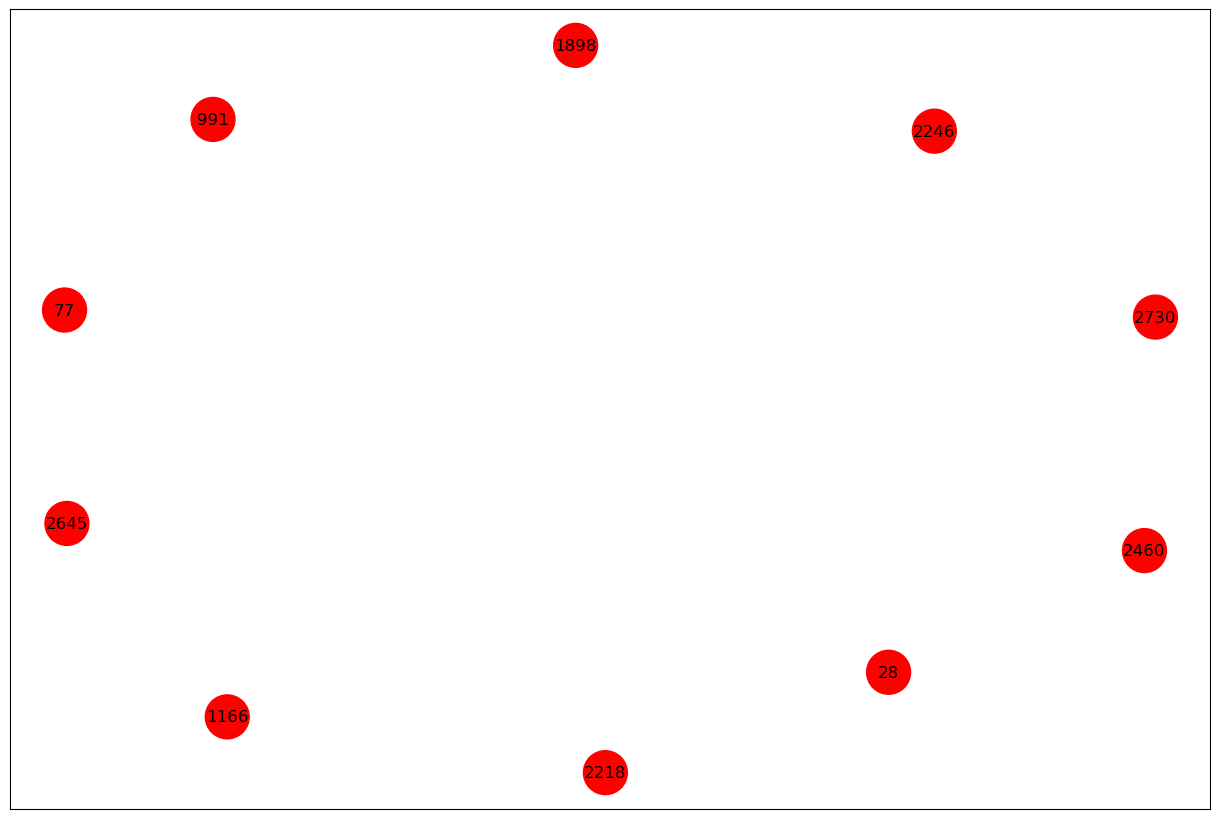

In [51]:
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, width=[G[u][v]['weight'] * 5 for u, v in G.edges()])

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('on')
plt.show()

10:57:45 - cmdstanpy - INFO - Chain [1] start processing
10:57:45 - cmdstanpy - INFO - Chain [1] done processing


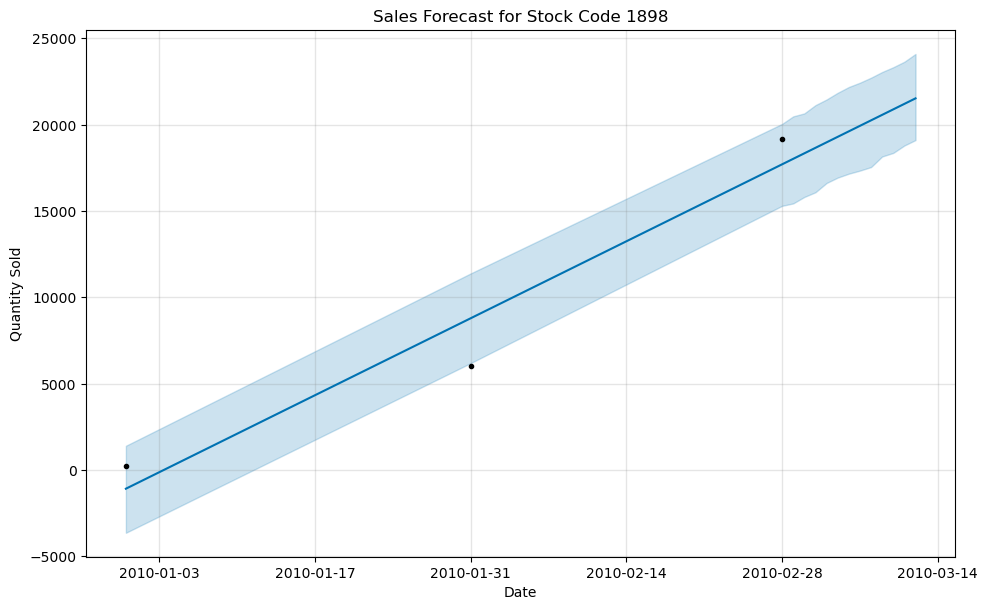

In [52]:
stock_data = df.groupby(['StockCode', pd.Grouper(key='InvoiceDate', freq='M')])['Quantity'].sum().reset_index()

# Select a top stock code 
top_stock_code = top_stock_codes[0]

# Forecast the sales 
from prophet import Prophet

stock_data_filtered = stock_data[stock_data['StockCode'] == top_stock_code]
stock_data_prophet = stock_data_filtered.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})
model = Prophet()

model.fit(stock_data_prophet)

future = model.make_future_dataframe(periods=12)  

forecast = model.predict(future)
model.plot(forecast)
plt.title(f'Sales Forecast for Stock Code {top_stock_code}')
plt.xlabel('Date')  
plt.ylabel('Quantity Sold')
plt.show()

### 4) Customer relationship management:
- a. “How can we know which customers are about to churn? If we could
know which customer has the highest churn rate in a given a month
then we could optimize our customer retention initiatives.”
- i. Please create a model to reduce the churn rate for the
organization at country level x month level.
- ii. Please justify quantitatively how you choose and why you
finalised the above model.
- iii. Create a view similar to the below image and derive & present
marketing strategies out of it. [Each dashboard should have
country as a filter]

In [53]:
rfm_data_scaled

array([[-0.24851672,  0.95699354,  0.0521444 ],
       [-0.90047482, -0.33643914, -0.08032581],
       [-0.17720881, -0.43593396, -0.08412587],
       ...,
       [ 2.08427083, -0.43593396, -0.07196567],
       [ 0.20989131, -0.23694432, -0.07677908],
       [-0.74767214, -0.03795468, -0.0734857 ]])

In [54]:
rfm_data

,Customer ID,Recency,Frequency,Monetary,Cluster
0,12346.0,4974,15,161.92,1
1,12347.0,4910,2,5.05,1
2,12348.0,4981,1,0.55,1
3,12349.0,4950,4,211.35,1
4,12351.0,4918,1,0.42,1
...,...,...,...,...,...
4378,18283.0,4925,6,10.54,1
4379,18284.0,4972,2,75.00,1
4380,18285.0,5203,1,14.95,0
4381,18286.0,5019,3,9.25,1


In [55]:
rfm_data['Churn'] = (rfm_data['Recency'] > 90).astype(int)
rfm_data['Customer_Relationship'] = (pd.to_datetime('today') - pd.to_datetime(rfm_data['Recency'])).dt.days


In [56]:
x = rfm_data.drop(['Customer ID', 'Churn'], axis=1)
y = rfm_data['Churn']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       877

    accuracy                           1.00       877
   macro avg       1.00      1.00      1.00       877
weighted avg       1.00      1.00      1.00       877



/home/devansh/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/devansh/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/devansh/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/devansh/anaconda3/lib/python3.11/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Model:", best_model)

/home/devansh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/devansh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/devansh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/devansh/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` i

In [ ]:
joblib.dump(best_model, 'churn_prediction_model.pkl')